In [0]:
!pip install quandl

In [0]:
import quandl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
quandl.ApiConfig.api_key = 'izoTyaHJR5SoE7Zy9yVx'

In [0]:
corn = quandl.get("CHRIS/CME_C1", authtoken="izoTyaHJR5SoE7Zy9yVx")

In [0]:
corn.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1959-07-01,120.2,120.3,119.6,119.7,NaN,119.7,3952.0,13997.0
1959-07-02,119.6,120.0,119.2,119.6,NaN,119.6,2223.0,14047.0
1959-07-06,119.4,119.5,117.7,118.0,NaN,118.0,3121.0,14206.0
1959-07-07,118.1,118.5,118.0,118.3,NaN,118.3,3540.0,14142.0
1959-07-08,118.4,118.5,117.3,117.3,NaN,117.3,2922.0,14353.0


In [0]:
last = corn['Last']

In [0]:
short_rolling = last.rolling(window=20).mean()
long_rolling = last.rolling(window=60).mean()
print(short_rolling.tail())
print(long_rolling.tail())

Date
2019-10-14    381.9125
2019-10-15    383.1750
2019-10-16    384.1750
2019-10-17    385.2625
2019-10-18    386.2500
Name: Last, dtype: float64
Date
2019-10-14    379.233333
2019-10-15    378.737500
2019-10-16    378.183333
2019-10-17    377.691667
2019-10-18    377.220833
Name: Last, dtype: float64


In [0]:
data = last

In [0]:
start_date = '2017-01-01'
end_date = '2019-12-31'

Text(0,0.5,'Price in $')

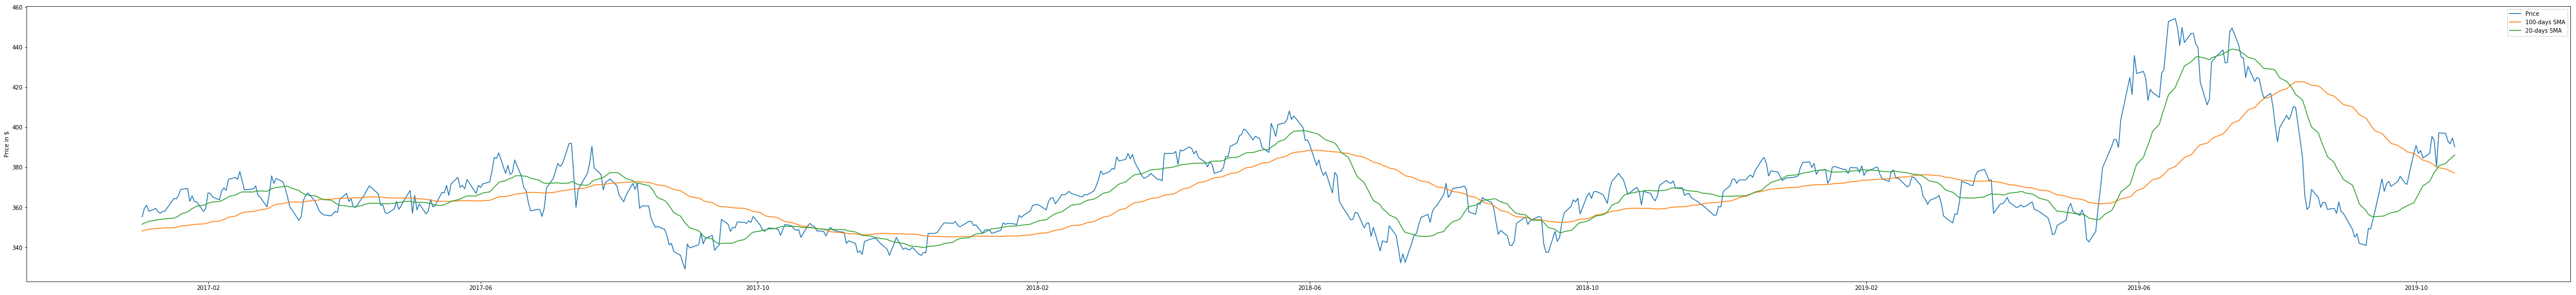

In [0]:
fig, ax = plt.subplots(figsize=(81,9))

ax.plot(data[start_date:end_date].index, data[start_date:end_date], label='Price')
ax.plot(long_rolling.loc[start_date:end_date].index, long_rolling.loc[start_date:end_date], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date].index, short_rolling.loc[start_date:end_date], label = '20-days SMA')
ax.legend(loc='best')
ax.set_ylabel('Price in $')

In [0]:
#EMA

In [0]:
ema_short = data.ewm(span=20, adjust=False).mean()

Text(0,0.5,'Price in $')

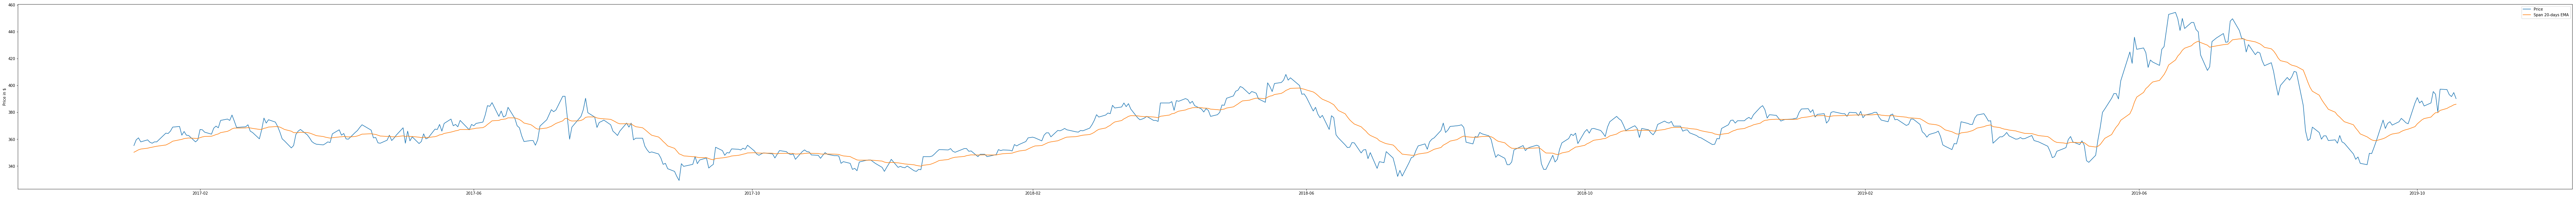

In [0]:
fig, ax = plt.subplots(figsize=(121,9))

ax.plot(data.loc[start_date:end_date].index, data.loc[start_date:end_date], label='Price')
ax.plot(ema_short.loc[start_date:end_date].index, ema_short.loc[start_date:end_date], label = 'Span 20-days EMA')
#ax.plot(short_rolling.loc[start_date:end_date].index, short_rolling.loc[start_date:end_date], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

##When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.
##When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset. **bold text**

In [0]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

Date
2019-10-14    14.066574
2019-10-15     9.334043
2019-10-16     7.087944
2019-10-17     9.127187
2019-10-18     4.186503
Name: Last, dtype: float64

In [0]:
trading_positions = trading_positions_raw.apply(np.sign)

Before seeing the performance of this strategy, let us focus on the first day to when the price timeseries p(to) crosses above and EMA timeseries ei(to). Since p(to)>ei(to). At that point the trading weight wi(to) becomes positive, and thus according to our trading strategy, we need to set for that day wi(to)=13.

However, bear in mind that p(to) is the price of the asset at the close of day to. For this reason, we will not know that p(to)>ei(to) until the close of the trading day. Therefore, when calculating the returns of the strategy, to assume that on day to we had a long position is an error; it is equivalent to us peaking into the future, since we only know we have to go long at the end of day to.

The best we can do is assume that we traded at the close of this day to. Therefore our position will be long starting on the following day, to+1. This is easily corrected for by lagging our trading positions by one day, so that on day to our actual position is that of the previous day to−1 and only on day to+1 do we have a long position. Thus:

In [0]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

Text(0,0.5,'Trading position')

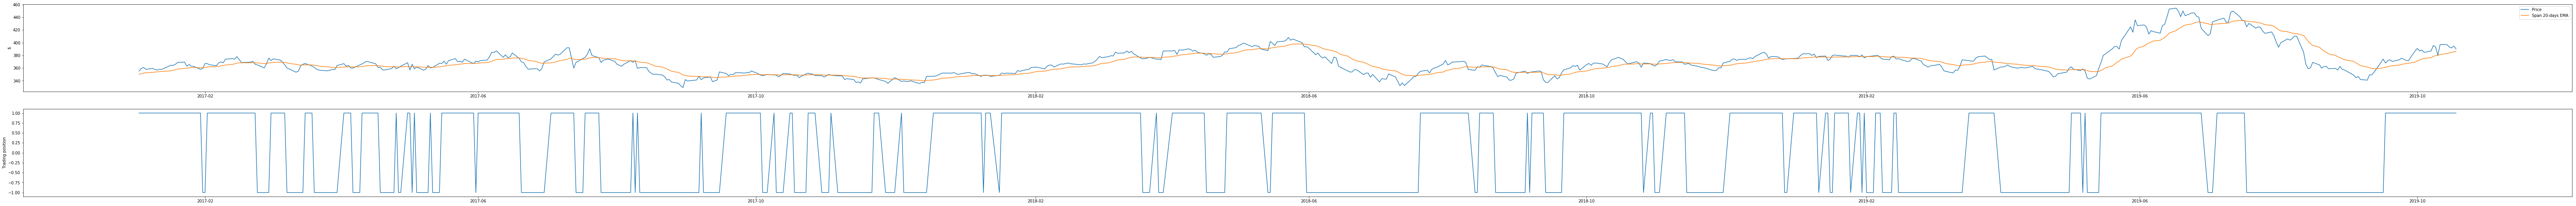

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(116,9))

ax1.plot(data.loc[start_date:end_date].index, data.loc[start_date:end_date], label='Price')
ax1.plot(ema_short.loc[start_date:end_date].index, ema_short.loc[start_date:end_date], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')

ax2.plot(trading_positions_final.loc[start_date:end_date].index, trading_positions_final.loc[start_date:end_date], 
        label='Trading position')

ax2.set_ylabel('Trading position')

In [0]:
returns = data.diff()
returns.head()

Date
1959-07-01    NaN
1959-07-02   -0.1
1959-07-06   -1.6
1959-07-07    0.3
1959-07-08   -1.0
Name: Last, dtype: float64

In [0]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()

Date
1959-07-01         NaN
1959-07-02   -0.000836
1959-07-06   -0.013468
1959-07-07    0.002539
1959-07-08   -0.008489
Name: Last, dtype: float64

In [0]:
asset_log_returns.head()

Date
1959-07-01         NaN
1959-07-02   -0.000836
1959-07-06   -0.013468
1959-07-07    0.002539
1959-07-08   -0.008489
Name: Last, dtype: float64

In [0]:
print trading_positions_final.loc[start_date:end_date].count()
print asset_log_returns.loc[start_date:end_date].count()
print returns[start_date:end_date].count()

705
705
705


In [0]:
strategy_asset_log_returns = trading_positions_final.loc[start_date:end_date] * asset_log_returns.loc[start_date:end_date]
print strategy_asset_log_returns.count()
print strategy_asset_log_returns.tail()

strategy_asset_returns = trading_positions_final.loc[start_date:end_date] * returns.loc[start_date:end_date]
print strategy_asset_returns.tail()

705
Date
2019-10-14   -0.000630
2019-10-15   -0.009491
2019-10-16   -0.003822
2019-10-17    0.007629
2019-10-18   -0.011465
Name: Last, dtype: float64
Date
2019-10-14   -0.25
2019-10-15   -3.75
2019-10-16   -1.50
2019-10-17    3.00
2019-10-18   -4.50
Name: Last, dtype: float64


In [0]:
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

In [0]:
cum_returns = returns.loc[start_date:end_date].cumsum()

In [0]:
print cum_returns.count()
print cum_returns.head()
print cum_returns.tail()

705
Date
2017-01-03    3.75
2017-01-04    8.00
2017-01-05    9.50
2017-01-06    6.50
2017-01-09    8.00
Name: Last, dtype: float64
Date
2019-10-14    45.50
2019-10-15    41.75
2019-10-16    40.25
2019-10-17    43.25
2019-10-18    38.75
Name: Last, dtype: float64


In [0]:
# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

In [0]:
buy_and_hold = returns[start_date:end_date].cumsum()
print buy_and_hold.count()
print buy_and_hold.head()
print buy_and_hold.tail()

705
Date
2017-01-03    3.75
2017-01-04    8.00
2017-01-05    9.50
2017-01-06    6.50
2017-01-09    8.00
Name: Last, dtype: float64
Date
2019-10-14    45.50
2019-10-15    41.75
2019-10-16    40.25
2019-10-17    43.25
2019-10-18    38.75
Name: Last, dtype: float64


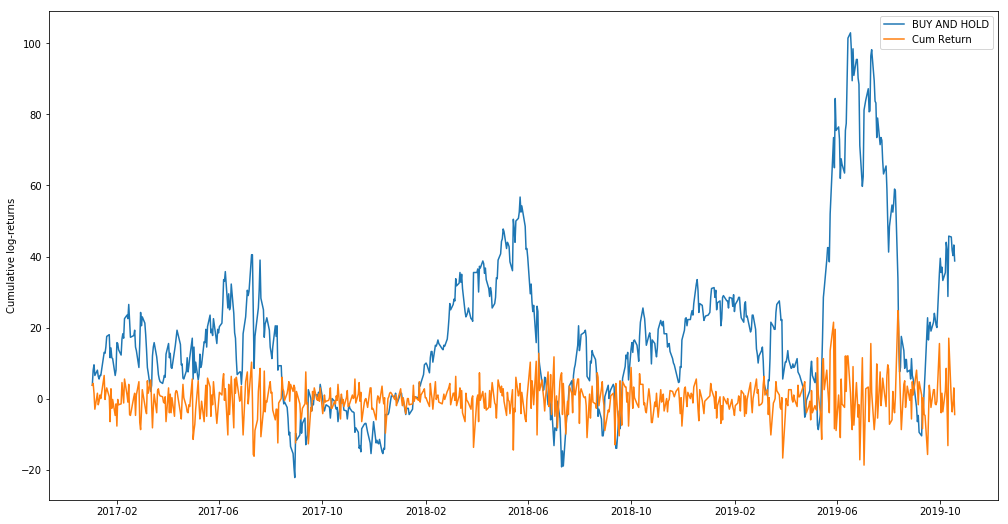

In [0]:
fig, ax1 = plt.subplots(figsize=(17,9))
  
#ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns, label='10-EMA')
ax1.plot(buy_and_hold.index, buy_and_hold, label='BUY AND HOLD')
ax1.plot(cum_returns.index, strategy_asset_returns, label='Cum Return')
#ax1.plot(data.loc[start_date:end_date].index, data.loc[start_date:end_date], label='Price')

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')

In [0]:
cum_relative_return_exact = cum_strategy_asset_relative_returns

In [0]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 38.38%
Average yearly return is:  0.00%
